In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("/content/weather_data.csv")

In [22]:
df.head(20)

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331
5,2023-01-06,24.148136,49.703435,6.587024,Rain,87.797432,995.818689
6,2023-01-07,23.671006,63.997418,5.654166,Rain,86.805669,998.296887
7,2023-01-08,32.245441,67.083073,6.940197,Rain,80.592540,963.347997
8,2023-01-09,30.078517,64.088581,4.520668,Rain,79.003044,958.060151
9,2023-01-10,31.620631,71.876470,11.214141,Rain,30.467914,1022.793931


Plotting the missing values

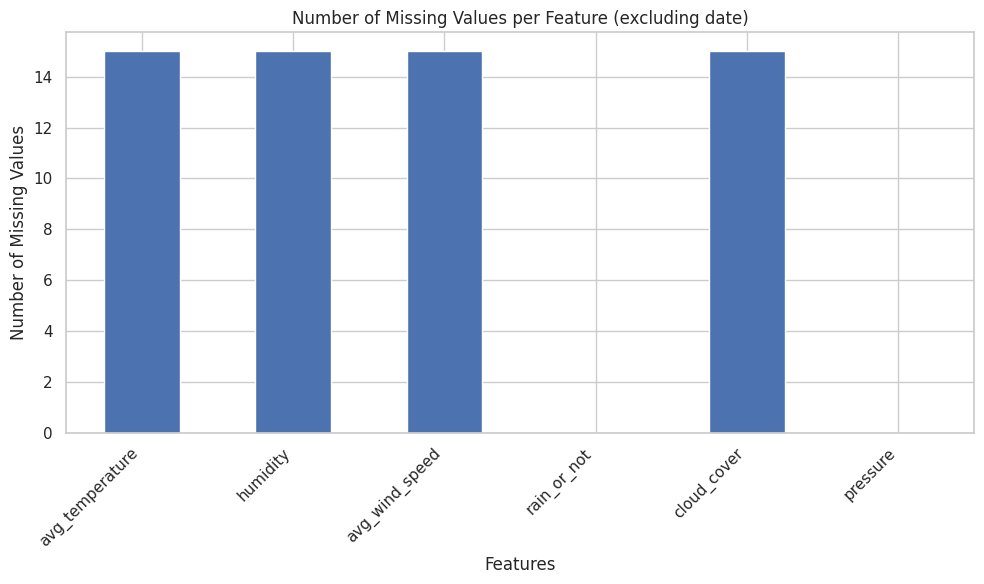

In [23]:
missing_values = df.drop(columns=['date']).isnull().sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Number of Missing Values per Feature (excluding date)')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Each feature—average temperature, humidity, average wind speed, rain or not, cloud cover, and pressure—has approximately 15 missing values.The data shows a consistent number of missing values across all features, suggesting a uniform issue in data collection or recording.

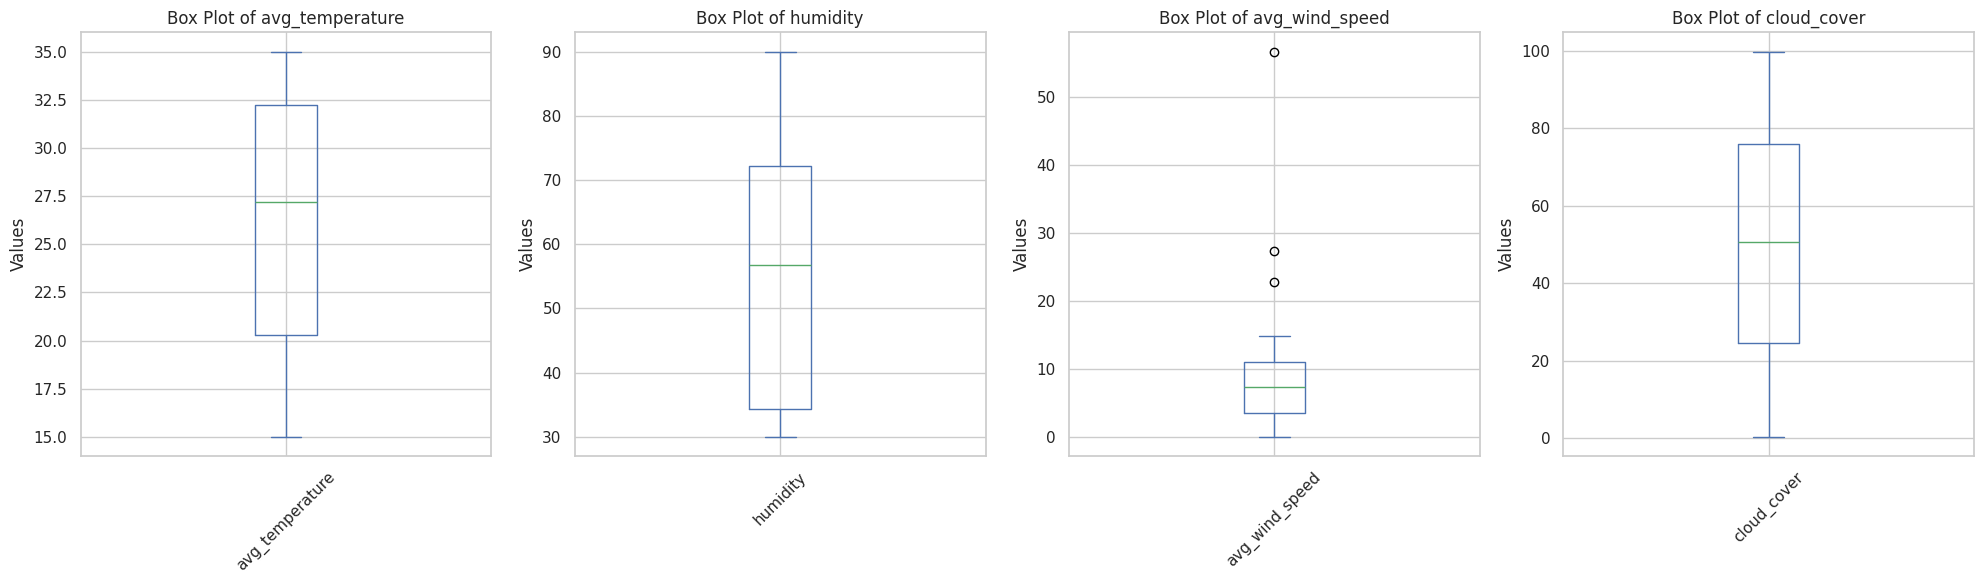

In [24]:
missing_values = df.drop(columns=['date']).isnull().sum()

# Filter features with missing values
features_with_missing = df.drop(columns=['date']).columns[missing_values > 0]

# Plot box plots for features with missing values in the same row
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
for i, feature in enumerate(features_with_missing, 1):
    plt.subplot(1, len(features_with_missing), i)  # 1 row, as many columns as features
    df[feature].plot(kind='box')
    plt.title(f'Box Plot of {feature}')
    plt.ylabel('Values')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

The box plots indicate that the average temperature and humidity are fairly evenly distributed, while the average wind speed has a few outliers suggesting occasional extreme values. Cloud cover is uniformly distributed across its possible range. These insights can help in understanding the variability and potential anomalies in the dataset.

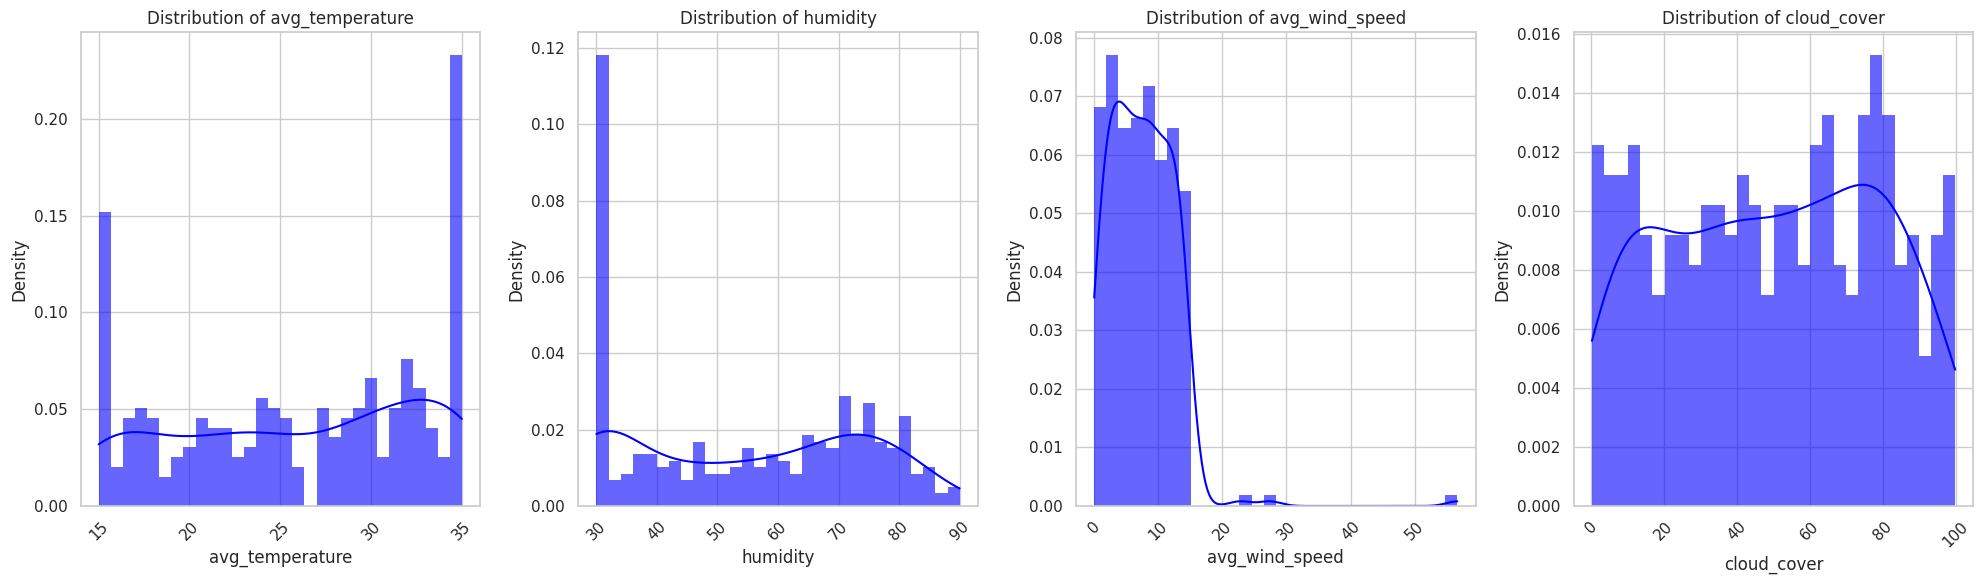

In [25]:
missing_values = df.drop(columns=['date']).isnull().sum()

# Filter features with missing values
features_with_missing = df.drop(columns=['date']).columns[missing_values > 0]

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot box plots and distribution for features with missing values in the same row
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
for i, feature in enumerate(features_with_missing, 1):
    plt.subplot(1, len(features_with_missing), i)  # 1 row, as many columns as features
    sns.histplot(df[feature], kde=True, color='blue', bins=30, stat="density", linewidth=0, alpha=0.6)
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Density')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

**avg_temperature:** The distribution is somewhat bimodal, with two peaks around 15 and 35. This suggests that the data might have two distinct groups or periods (e.g., winter and summer).
**humidity:** The distribution is highly skewed to the right, with a peak around 30 and long tail extending to the right.
**avg_wind_speed:** The distribution is also skewed to the right, with a peak around 5 and a long tail extending to the right.
**cloud_cover:** The distribution is multimodal, with multiple peaks, suggesting that there are several distinct groups or periods.

### Since the missing values doesn't seem to follow the normal distribution it is not ideal to imput the missing values with the mean or median. So we are using an inference based approach to impute the missing values. 

In [26]:
from sklearn.impute import KNNImputer

# Create an imputer object
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
df_imputed = imputer.fit_transform(df[features_with_missing])

# Convert back to DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=features_with_missing)

# Combine the imputed data with the original DataFrame
df = df.drop(columns=features_with_missing).join(df_imputed)

In [27]:
missing_values_count = df.isnull().sum()

# Print the number of missing values for each feature
for column, count in missing_values_count.items():
      print(f"Feature: {column}, Number of Missing Values: {count}")

Feature: date, Number of Missing Values: 0
Feature: rain_or_not, Number of Missing Values: 0
Feature: pressure, Number of Missing Values: 0
Feature: avg_temperature, Number of Missing Values: 0
Feature: humidity, Number of Missing Values: 0
Feature: avg_wind_speed, Number of Missing Values: 0
Feature: cloud_cover, Number of Missing Values: 0


In [28]:
data_types = df.dtypes

# Print the data type for each feature
for column, dtype in data_types.items():
    print(f"Feature: {column}, Data Type: {dtype}")

Feature: date, Data Type: object
Feature: rain_or_not, Data Type: object
Feature: pressure, Data Type: float64
Feature: avg_temperature, Data Type: float64
Feature: humidity, Data Type: float64
Feature: avg_wind_speed, Data Type: float64
Feature: cloud_cover, Data Type: float64


Label encoding the target variable

In [29]:
df['rain_or_not'] = df['rain_or_not'].replace({'Rain': 1, 'No Rain': 0})

# Verify the encoding
print(df['rain_or_not'].value_counts())

rain_or_not
1    198
0    113
Name: count, dtype: int64


<ipython-input-29-2b976b3d868f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rain_or_not'] = df['rain_or_not'].replace({'Rain': 1, 'No Rain': 0})


In [30]:
df.to_csv('weather_data_preprocessed.csv', index=False)